# Proyek Analisis Data: Bike sharing-dataset

- **Nama:** Rangga Aldo Sastrowardoyo

- **Email:** ranggaaldosas@gmail.com
- **ID Dicoding:** ranggaaldosas


## Menentukan Pertanyaan Bisnis


1. Bagaimana persebaran waktu /24 jam dalam peminjaman sepeda, apakah langkah menyediakan 24 jam service cukup  optimal?
2. Apakah faktor alam mempengaruhi jumlah peminjaman sepeda?
3. Apakah faktor buatan manusia juga mempengaruhi jumlah peminjaman sepeda?
4. Apakah bisnis peminjaman sepeda berkembang seiring nya tahun?


## Import Semua Packages/Library yang Digunakan


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno as msno
import scipy.stats as statsx

## Data Wrangling


### Gathering Data


In [2]:
day_df = pd.read_csv("./Bike-sharing-dataset/day.csv")
hour_df = pd.read_csv("./Bike-sharing-dataset/hour.csv")

In [3]:
day_df.head(6)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606


In [4]:
hour_df.head(6)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1


Kedua dataset memiliki kemiripan, yang membedekan hanya basis dari peminjaman sepeda tersebut, hourly atau daily


In [5]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Numerical
- instant: Indeks catatan.
- dteday: Tanggal.
- yr: Tahun (0: 2011, 1: 2012).
- hr: Jam (0 sampai 23) - hanya tersedia di hour.csv.
- temp: Suhu dinormalisasi dalam Celsius. Nilainya dibagi dengan 41 (maks).
- atemp: Suhu terasa dinormalisasi dalam Celsius. Nilainya dibagi dengan 50 (maks).
- hum: Kelembaban dinormalisasi. Nilainya dibagi dengan 100 (maks).
- windspeed: Kecepatan angin dinormalisasi. Nilainya dibagi dengan 67 (maks).
- casual: Jumlah pengguna kasual.
- registered: Jumlah pengguna terdaftar.
- cnt: Jumlah total sepeda yang disewakan termasuk pengguna kasual dan terdaftar.

Categorical
- season: Musim (1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin).
- mnth: Bulan (1 sampai 12).
- holiday: Apakah hari tersebut libur atau tidak (diambil dari http://dchr.dc.gov/page/holiday-schedule).
- weekday: Hari dalam minggu.
- workingday: Jika hari bukan akhir pekan atau libur maka bernilai 1, sebaliknya 0.
- weathersit:
  - 1: Cerah, Sedikit berawan, Sebagian berawan, Sebagian berawan.
  - 2: Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut.
  - 3: Salju ringan, Hujan ringan + Badai petir + Awan berpencar, Hujan ringan + Awan berpencar.
  - 4: Hujan lebat + Butiran es + Badai petir + Kabut, Salju + Kabut.
  

### Assessing Data


In [7]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [8]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [9]:
def summarize_dataframe_columns(dataframe):
    summary_data = []
    dataframe_name = [name for name, var in globals().items() if var is dataframe][0]

    for column in dataframe.columns:
        nulls = dataframe[column].isnull().sum()
        dtype = dataframe[column].dtype

        summary_data.append([dataframe_name, column, nulls, dtype])

    summary_df = pd.DataFrame(
        summary_data, columns=["DataFrame", "Column", "Nulls", "Type"]
    )
    return summary_df


consolidated_summary = pd.DataFrame(columns=["DataFrame", "Column", "Nulls", "Type"])

dataframe_variables = [
    "day_df",
    "hour_df",
]

for df_name in dataframe_variables:
    df_object = globals()[df_name]
    df_summary = summarize_dataframe_columns(df_object)
    consolidated_summary = pd.concat([consolidated_summary, df_summary])

consolidated_summary.reset_index(drop=True, inplace=True)

consolidated_summary

,DataFrame,Column,Nulls,Type
0,day_df,instant,0,int64
1,day_df,dteday,0,object
2,day_df,season,0,int64
3,day_df,yr,0,int64
4,day_df,mnth,0,int64
5,day_df,holiday,0,int64
6,day_df,weekday,0,int64
7,day_df,workingday,0,int64
8,day_df,weathersit,0,int64
9,day_df,temp,0,float64


Terlihat tidak ada missing values untuk kedua dataframe, terdapat cara alternatif untuk mencari missing values lebih detail lagi, bisa digunakan library msno


#### Berbagai metode pengecekan missing value


<Axes: >

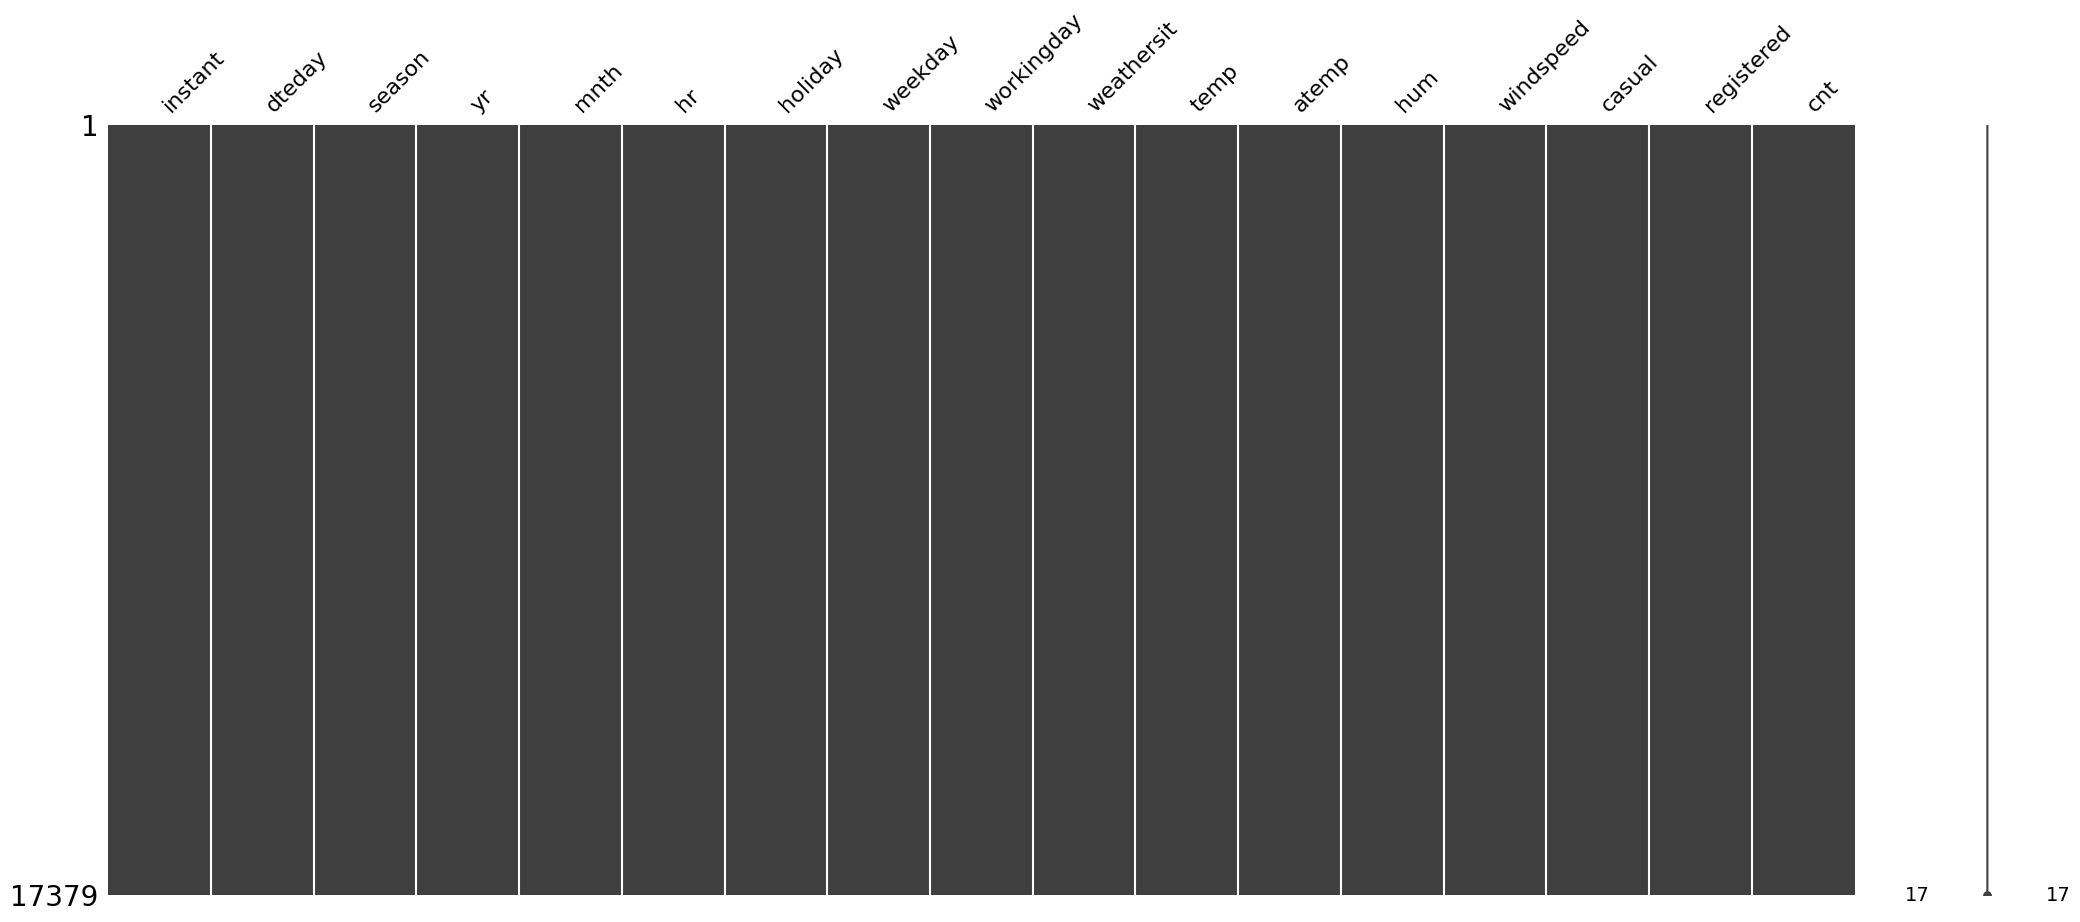

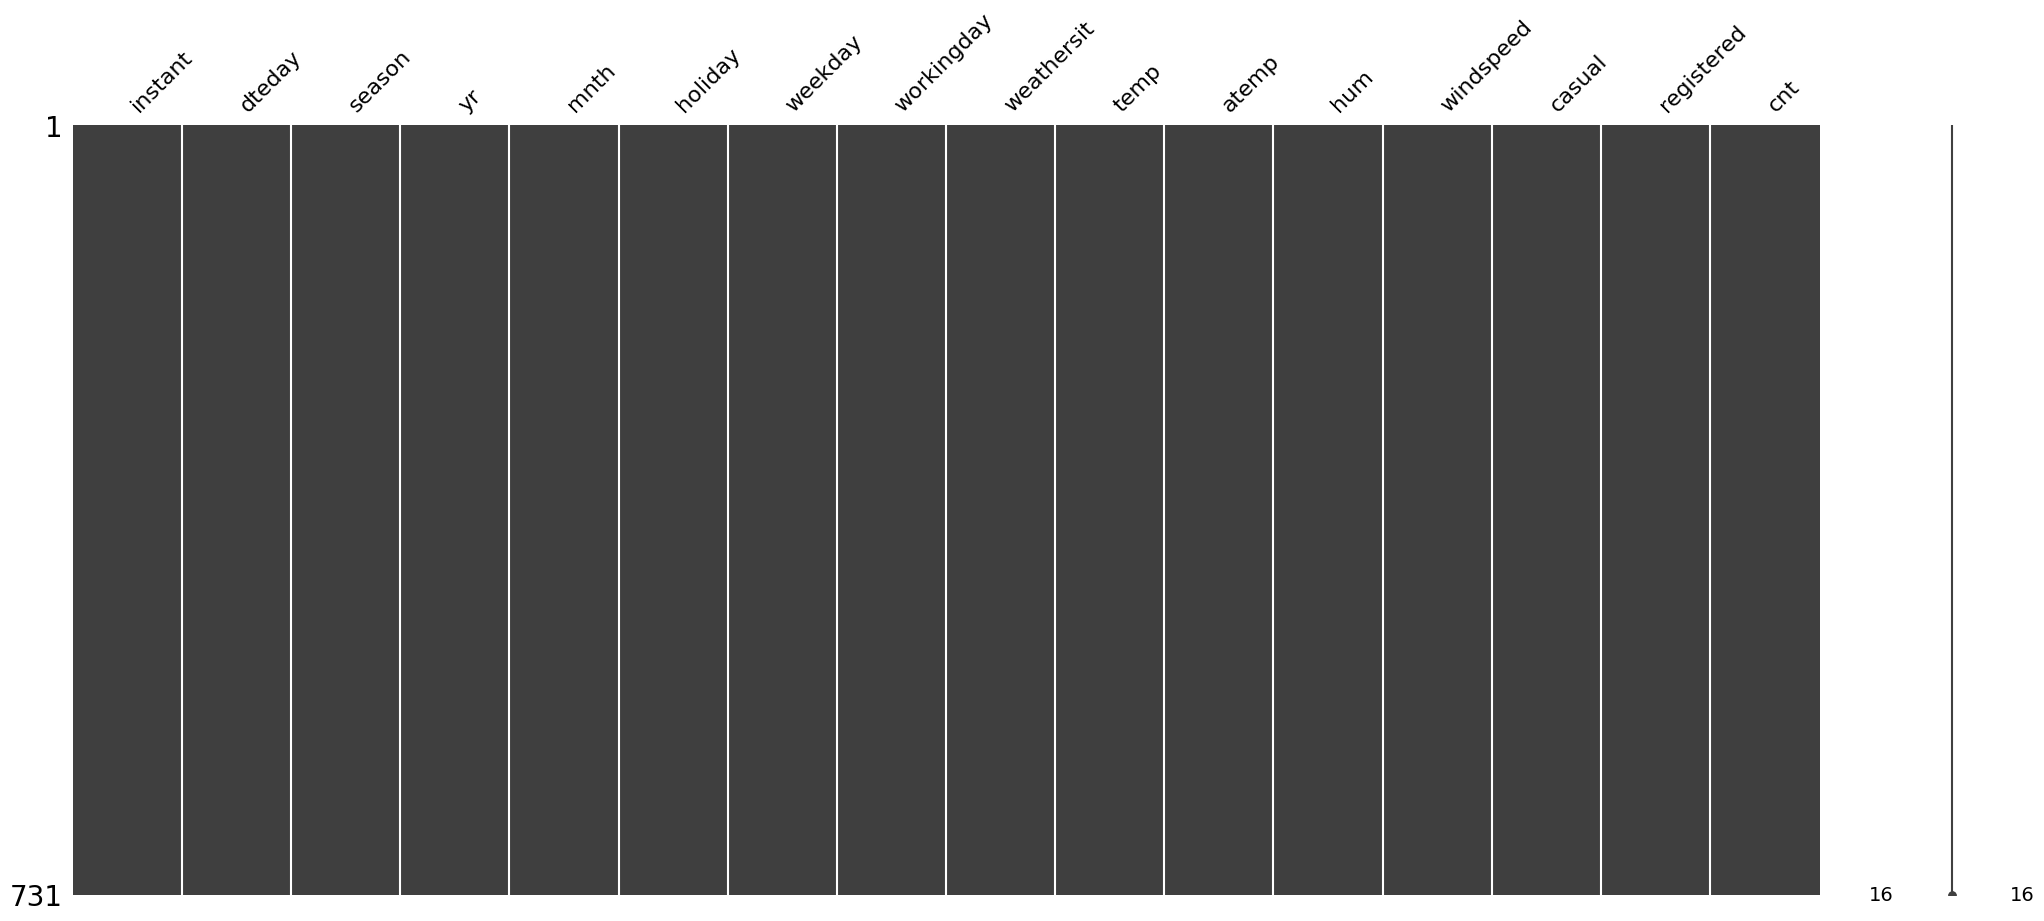

In [10]:
msno.matrix(hour_df)
msno.matrix(day_df)

In [11]:
# Identifying missing values in the train dataset
missing_values = hour_df.isnull().sum()

missing_values_percentage = (missing_values / len(hour_df)) * 100

missing_data = pd.DataFrame(
    {
        "Total Missing": missing_values,
        "Percentage Missing (%)": missing_values_percentage,
    }
)

missing_data[missing_data["Total Missing"] >= 0].sort_values(
    by="Percentage Missing (%)", ascending=False
)

,Total Missing,Percentage Missing (%)
instant,0,0.0
weathersit,0,0.0
registered,0,0.0
casual,0,0.0
windspeed,0,0.0
hum,0,0.0
atemp,0,0.0
temp,0,0.0
workingday,0,0.0
dteday,0,0.0


In [12]:
# Identifying missing values in the train dataset
missing_values = day_df.isnull().sum()

missing_values_percentage = (missing_values / len(day_df)) * 100

missing_data = pd.DataFrame(
    {
        "Total Missing": missing_values,
        "Percentage Missing (%)": missing_values_percentage,
    }
)

missing_data[missing_data["Total Missing"] >= 0].sort_values(
    by="Percentage Missing (%)", ascending=False
)

,Total Missing,Percentage Missing (%)
instant,0,0.0
dteday,0,0.0
season,0,0.0
yr,0,0.0
mnth,0,0.0
holiday,0,0.0
weekday,0,0.0
workingday,0,0.0
weathersit,0,0.0
temp,0,0.0


#### Pengecekan duplicates


In [13]:
def check_for_duplicates(dataframe_variables):
    duplicates_summary = []

    for df_name in dataframe_variables:
        df_object = globals()[df_name]
        duplicated_rows_count = df_object.duplicated(keep=False).sum()

        if duplicated_rows_count > 0:
            duplicates_summary.append([df_name, duplicated_rows_count])

    if duplicates_summary:
        duplicates_df = pd.DataFrame(
            duplicates_summary, columns=["DataFrame", "Duplicated Rows"]
        )
    else:
        duplicates_df = pd.DataFrame(columns=["DataFrame", "Duplicated Rows"])
        print("No duplicated rows found in any DataFrame.")

    return duplicates_df


duplicates_report = check_for_duplicates(dataframe_variables)

duplicates_report

No duplicated rows found in any DataFrame.


,DataFrame,Duplicated Rows


In [14]:
hour_df.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [15]:
day_df.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

#### Renaming Columns agar lebih jelas

In [16]:
day_df.rename(
    columns={
        "dteday": "tanggal",
        "yr": "tahun",
        "mnth": "month",
        "weathersit": "kondisi_cuaca",
        "hum": "humidity",
        "casual" : "jumlah_pengguna_casual",
        "cnt": "jumlah_total",
    },
    inplace=True,
)

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   instant                 731 non-null    int64  
 1   tanggal                 731 non-null    object 
 2   season                  731 non-null    int64  
 3   tahun                   731 non-null    int64  
 4   month                   731 non-null    int64  
 5   holiday                 731 non-null    int64  
 6   weekday                 731 non-null    int64  
 7   workingday              731 non-null    int64  
 8   kondisi_cuaca           731 non-null    int64  
 9   temp                    731 non-null    float64
 10  atemp                   731 non-null    float64
 11  humidity                731 non-null    float64
 12  windspeed               731 non-null    float64
 13  jumlah_pengguna_casual  731 non-null    int64  
 14  registered              731 non-null    in

In [17]:
hour_df.rename(
    columns={
        "dteday": "tanggal",
        "yr": "tahun",
        "mnth": "month",
        "weathersit": "kondisi_cuaca",
        "hum": "humidity",
        "casual" : "jumlah_pengguna_casual",
        "cnt": "jumlah_total",
        "hr": "hour"
    },
    inplace=True,
)

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   instant                 17379 non-null  int64  
 1   tanggal                 17379 non-null  object 
 2   season                  17379 non-null  int64  
 3   tahun                   17379 non-null  int64  
 4   month                   17379 non-null  int64  
 5   hour                    17379 non-null  int64  
 6   holiday                 17379 non-null  int64  
 7   weekday                 17379 non-null  int64  
 8   workingday              17379 non-null  int64  
 9   kondisi_cuaca           17379 non-null  int64  
 10  temp                    17379 non-null  float64
 11  atemp                   17379 non-null  float64
 12  humidity                17379 non-null  float64
 13  windspeed               17379 non-null  float64
 14  jumlah_pengguna_casual  17379 non-null

In [18]:
mapping_dict = {0: '2011', 1: '2012'}

# mapping
day_df['tahun'] = day_df['tahun'].map(mapping_dict)
hour_df['tahun'] = hour_df['tahun'].map(mapping_dict)

In [19]:
day_df['season']=day_df.season.astype('category')
day_df['month']=day_df.month.astype('category')
day_df['holiday']=day_df.holiday.astype('category')
day_df['weekday']=day_df.weekday.astype('category')
day_df['workingday']=day_df.workingday.astype('category')
day_df['kondisi_cuaca']=day_df.kondisi_cuaca.astype('category')
day_df['tahun'] = day_df['tahun'].astype('category')

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   instant                 731 non-null    int64   
 1   tanggal                 731 non-null    object  
 2   season                  731 non-null    category
 3   tahun                   731 non-null    category
 4   month                   731 non-null    category
 5   holiday                 731 non-null    category
 6   weekday                 731 non-null    category
 7   workingday              731 non-null    category
 8   kondisi_cuaca           731 non-null    category
 9   temp                    731 non-null    float64 
 10  atemp                   731 non-null    float64 
 11  humidity                731 non-null    float64 
 12  windspeed               731 non-null    float64 
 13  jumlah_pengguna_casual  731 non-null    int64   
 14  registered              73

In [20]:
hour_df['season']=hour_df.season.astype('category')
hour_df['month']=hour_df.month.astype('category')
hour_df['holiday']=hour_df.holiday.astype('category')
hour_df['weekday']=hour_df.weekday.astype('category')
hour_df['workingday']=hour_df.workingday.astype('category')
hour_df['kondisi_cuaca']=hour_df.kondisi_cuaca.astype('category')

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   instant                 17379 non-null  int64   
 1   tanggal                 17379 non-null  object  
 2   season                  17379 non-null  category
 3   tahun                   17379 non-null  object  
 4   month                   17379 non-null  category
 5   hour                    17379 non-null  int64   
 6   holiday                 17379 non-null  category
 7   weekday                 17379 non-null  category
 8   workingday              17379 non-null  category
 9   kondisi_cuaca           17379 non-null  category
 10  temp                    17379 non-null  float64 
 11  atemp                   17379 non-null  float64 
 12  humidity                17379 non-null  float64 
 13  windspeed               17379 non-null  float64 
 14  jumlah_pengguna_casual

In [21]:
column_types = day_df.dtypes

numerical_columns = [col for col, dtype in column_types.items() if dtype in ["int64", "float64"]]
categorical_columns = [col for col, dtype in column_types.items() if dtype in ["category"]]
other_columns = [col for col, dtype in column_types.items() if dtype not in ["int64", "float64", "category"]]

message_numerical = "Ini adalah kolom Numerik:\n- " + "\n- ".join(numerical_columns)
message_categorical = "Ini adalah kolom Kategorikal:\n- " + "\n- ".join(categorical_columns)
message_other = "Ini adalah kolom Lainnya (jika ada):\n- " + "\n- ".join(other_columns)

print(message_numerical)
print("\n" + message_categorical)
if other_columns:  # Print only if there are other types of columns
    print("\n" + message_other)
else:
    print("\nTidak ada kolom Lainnya.")

Ini adalah kolom Numerik:
- instant
- temp
- atemp
- humidity
- windspeed
- jumlah_pengguna_casual
- registered
- jumlah_total

Ini adalah kolom Kategorikal:
- season
- tahun
- month
- holiday
- weekday
- workingday
- kondisi_cuaca

Ini adalah kolom Lainnya (jika ada):
- tanggal


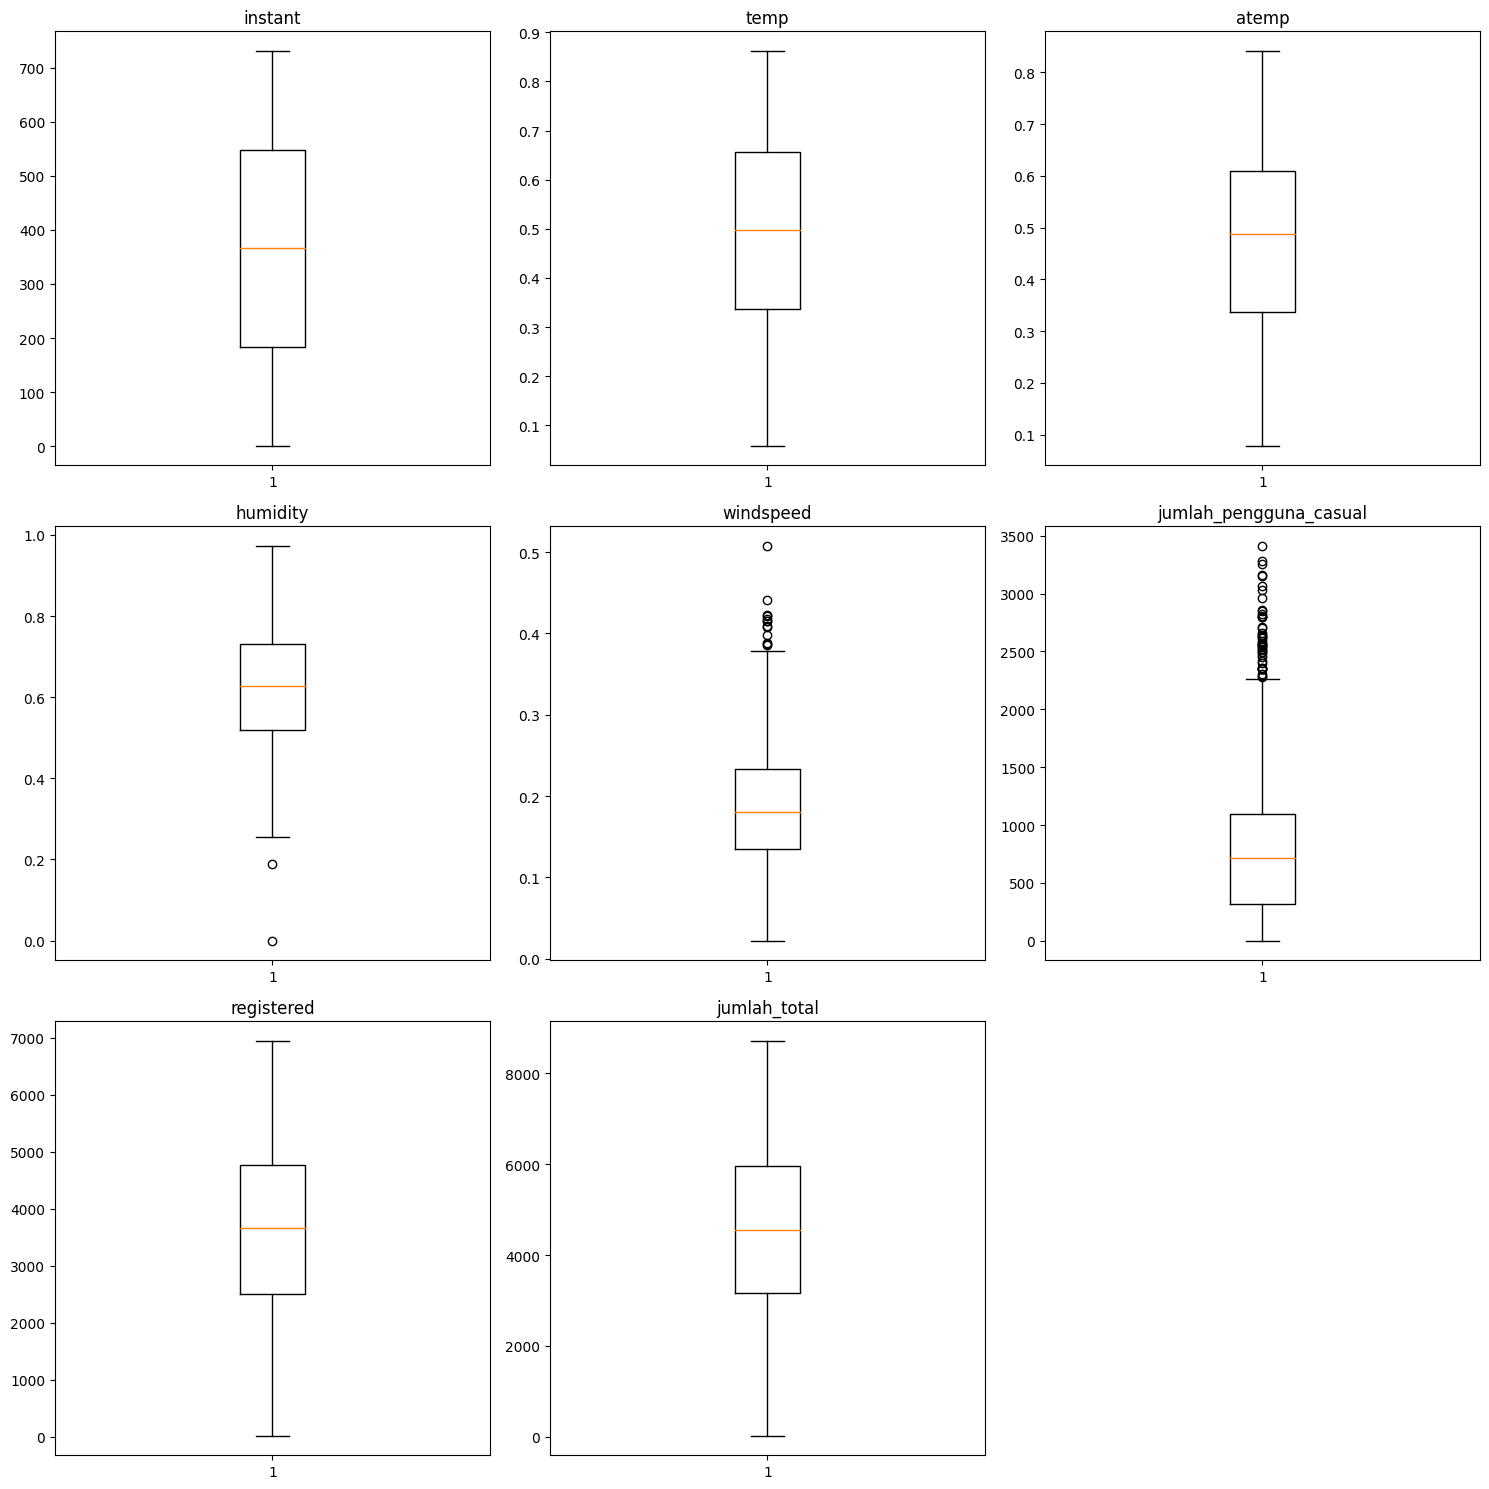

In [22]:
numerical_columns = day_df.select_dtypes(include=['int64', 'float64']).columns

# Determine the grid size for subplots
n = len(numerical_columns)  # Number of numerical columns
cols = 3  # Number of columns in subplot grid
rows = n // cols + (n % cols > 0)  # Calculate rows needed, add one if there's a remainder

# Create a subplot for each numerical column
plt.figure(figsize=(15, 5 * rows))  # Adjust overall figure size as needed
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(rows, cols, i)
    plt.boxplot(day_df[column].dropna())  # Drop NA values for plotting
    plt.title(column)

plt.tight_layout()
plt.show()

#### Pengecekan Outliers dengan IQR

In [23]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    return (dataframe[col_name] > up_limit).any() or (dataframe[col_name] < low_limit).any()

for col in numerical_columns:
    print(f"{col}: {check_outlier(day_df, col)}")

instant: False
temp: False
atemp: False
humidity: False
windspeed: False
jumlah_pengguna_casual: False
registered: False
jumlah_total: False


#### Key Takeaways

- Ada column redundant (instant) yang bisa memberikan insight menarik dikarenakan class ini sama saja dengan indeks
- Tidak ada duplicated rows
- Tidak ada missing 
- Tidak ada outliers dengan pendeteksian IQR


In [24]:
# hour_df_prefixed = hour_df.add_prefix("hour_")
# day_df_prefixed = day_df.add_prefix("day_")

# # Renaming 'dteday' column to match in both dataframes for merging
# hour_df_prefixed.rename(columns={"hour_dteday": "dteday"}, inplace=True)
# day_df_prefixed.rename(columns={"day_dteday": "dteday"}, inplace=True)

# # Merging the two datasets based on 'dteday'
# bikeshare_df = pd.merge(hour_df_prefixed, day_df_prefixed, on="dteday", how="outer")

# # Displaying the first few rows of the merged dataframe for verification
# bikeshare_df.head()

### Cleaning Data


A. Drop redundant columns


In [25]:
kolom_yang_dihapus = ["instant"]


hour_df = hour_df.drop(kolom_yang_dihapus, axis=1)
day_df = day_df.drop(kolom_yang_dihapus, axis=1)

B. Change to datetime


In [26]:
day_df["tanggal"] = pd.to_datetime(day_df.tanggal)

In [27]:
hour_df["tanggal"] = pd.to_datetime(hour_df.tanggal)

In [28]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   tanggal                 731 non-null    datetime64[ns]
 1   season                  731 non-null    category      
 2   tahun                   731 non-null    category      
 3   month                   731 non-null    category      
 4   holiday                 731 non-null    category      
 5   weekday                 731 non-null    category      
 6   workingday              731 non-null    category      
 7   kondisi_cuaca           731 non-null    category      
 8   temp                    731 non-null    float64       
 9   atemp                   731 non-null    float64       
 10  humidity                731 non-null    float64       
 11  windspeed               731 non-null    float64       
 12  jumlah_pengguna_casual  731 non-null    int64     

In [29]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   tanggal                 17379 non-null  datetime64[ns]
 1   season                  17379 non-null  category      
 2   tahun                   17379 non-null  object        
 3   month                   17379 non-null  category      
 4   hour                    17379 non-null  int64         
 5   holiday                 17379 non-null  category      
 6   weekday                 17379 non-null  category      
 7   workingday              17379 non-null  category      
 8   kondisi_cuaca           17379 non-null  category      
 9   temp                    17379 non-null  float64       
 10  atemp                   17379 non-null  float64       
 11  humidity                17379 non-null  float64       
 12  windspeed               17379 non-null  float6

## Exploratory Data Analysis (EDA)


### Explore ...


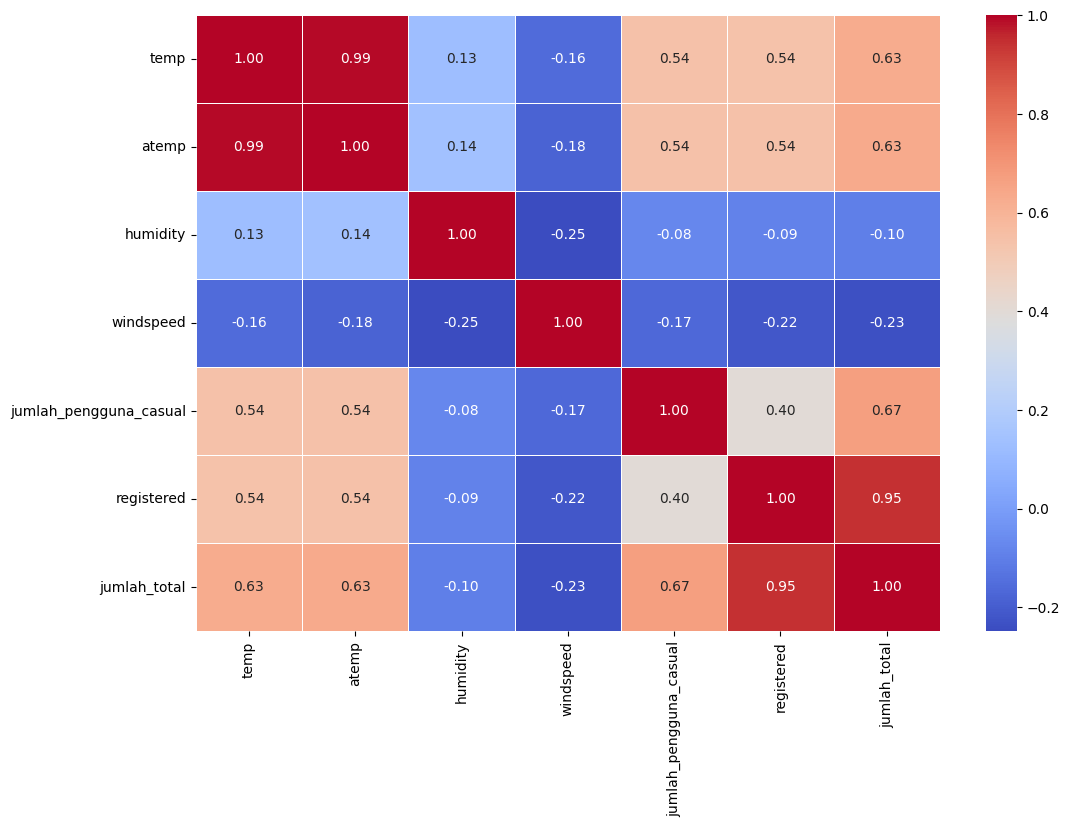

In [30]:
fig = plt.figure(figsize=(12, 8))

corr = day_df.corr(numeric_only=True)

ax = sns.heatmap(corr, linewidths=.5, cmap="coolwarm", annot=True, fmt=".2f")

plt.show()

#### Beberapa insight yang bisa didapat adalah
- Temperature dan Windspeed sangat tidak berkorelasi, yang menandakan jika temprature nya tinggi atau panas, maka tidak ada angin
- jumlah_total, jumlah_pengguna_casual, dan registered mempunyai korelasi kuat antar sesama nya
- temp dan atemp mempunyai korelasi yang kuat juga, jadi bisa dipakai salah satu saja untuk kedepan nya


In [31]:
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
month_mapping = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
weathersit_mapping = {1: 'Clear', 2: 'Misty', 3: 'Light_rainsnow'}
weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
                   4: 'Thursday', 5: 'Friday', 6: 'Saturday'}

day_df['season'] = day_df['season'].map(season_mapping)
day_df['month'] = day_df['month'].map(month_mapping)
day_df['kondisi_cuaca'] = day_df['kondisi_cuaca'].map(weathersit_mapping)
day_df['weekday'] = day_df['weekday'].map(weekday_mapping)

hour_df['season'] = hour_df['season'].map(season_mapping)
hour_df['month'] = hour_df['month'].map(month_mapping)
hour_df['kondisi_cuaca'] = hour_df['kondisi_cuaca'].map(weathersit_mapping)
hour_df['weekday'] = hour_df['weekday'].map(weekday_mapping)

Summary for kondisi_cuaca:
                kondisi_cuaca  Ratio
Clear                     463  63.34
Misty                     247  33.79
Light_rainsnow             21   2.87


Summary for season:
        season  Ratio
Fall       188  25.72
Summer     184  25.17
Spring     181  24.76
Winter     178  24.35




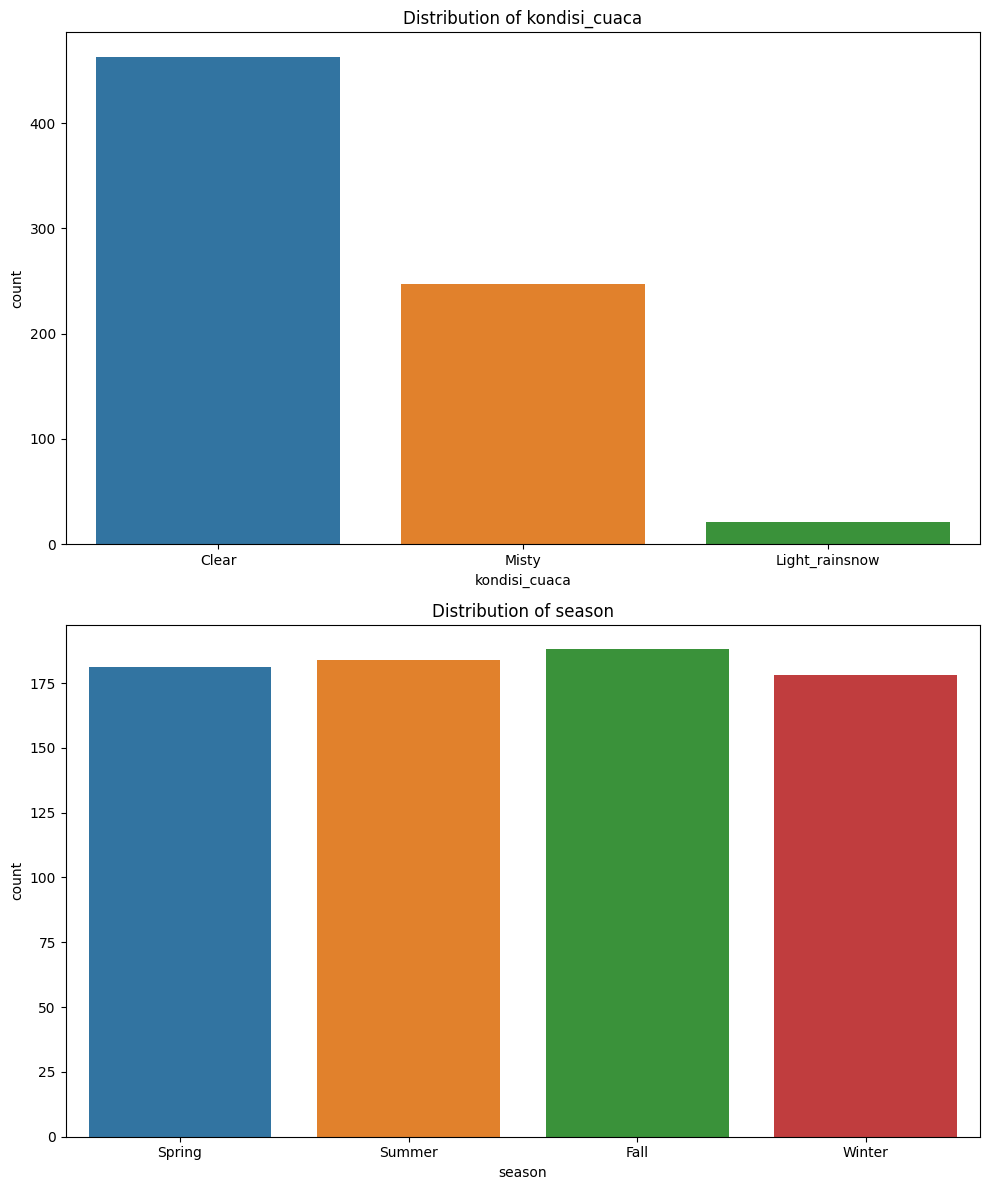

In [32]:
def summary_categorical_columns(dataframe, col_names, plot=False):
    for col_name in col_names:
        print(f"Summary for {col_name}:")
        print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                            'Ratio': round(100 * dataframe[col_name].value_counts() / len(dataframe), 2)}))
        print("\n")  
    
    if plot:
        n_cols = 1 
        n_rows = (len(col_names) + n_cols - 1) // n_cols
        
        plt.figure(figsize=(10, 6 * n_rows))  # Adjust figure size as needed
        
        for i, col_name in enumerate(col_names, start=1):
            plt.subplot(n_rows, n_cols, i)
            sns.countplot(x=col_name, data=dataframe)
            plt.title(f'Distribution of {col_name}')
        
        plt.tight_layout()
        plt.show()

col_names_to_summarize = ['kondisi_cuaca', 'season']
summary_categorical_columns(day_df, col_names_to_summarize, plot=True)

- Musim yang clear/cerah mendominasi jumlah count, yang menandakan pada musim cerah, bike sharing cukup digemari masyarakat.
- Pada musim hujan ringan, dominasi tadi menjadi sangat turun yang menandakan jarangnya masyarakat melakukan peminjaman sepeda.

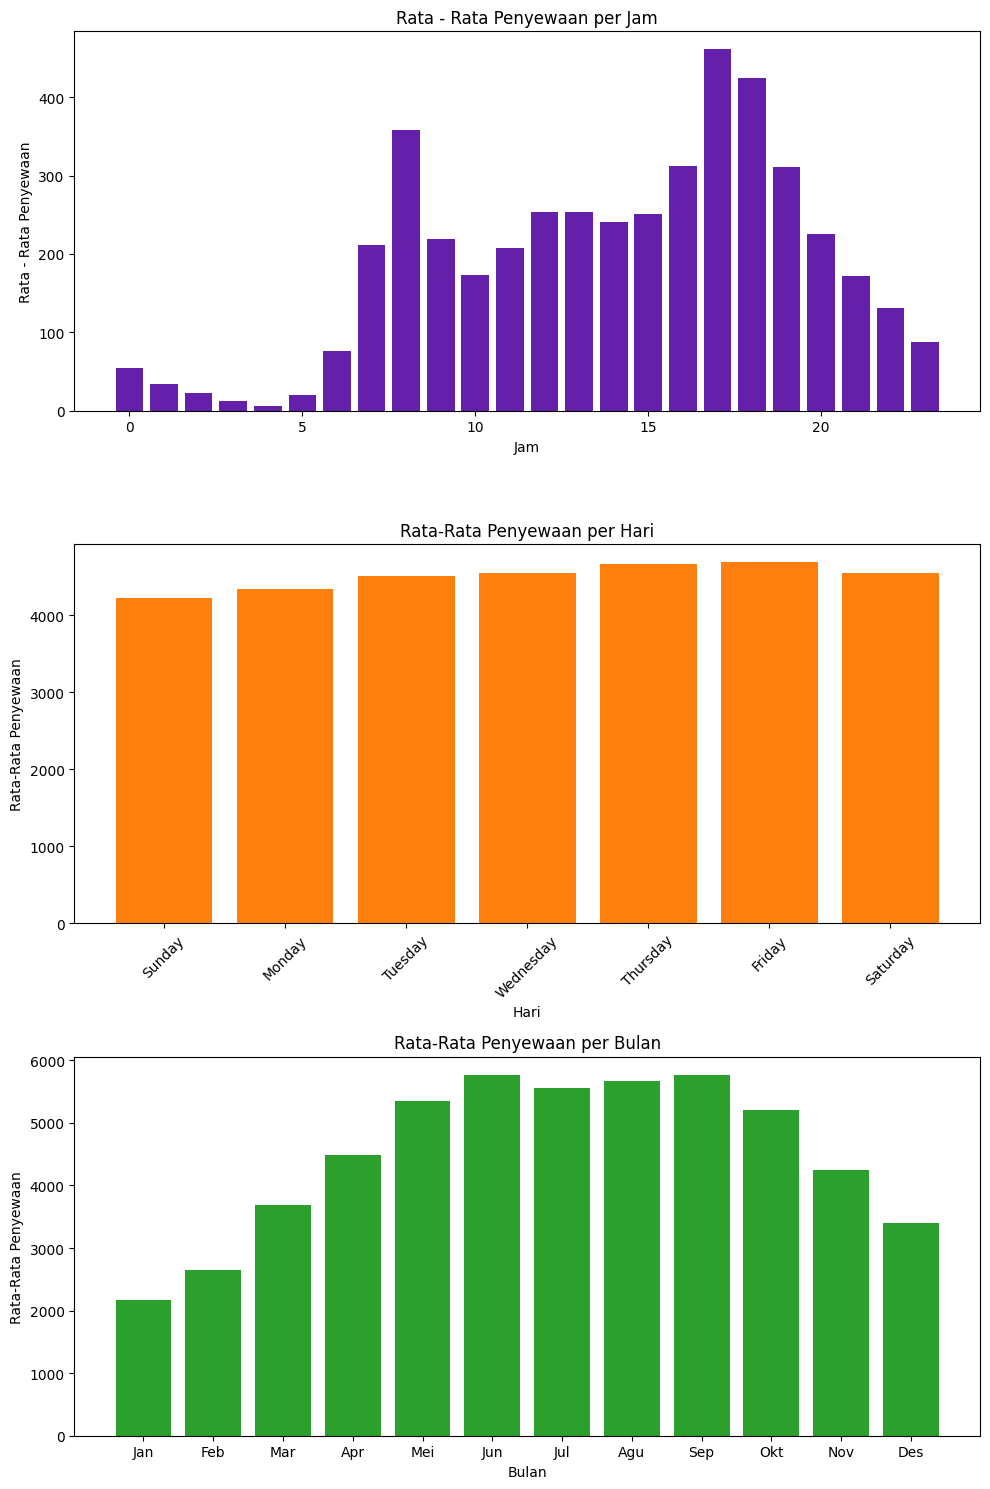

In [33]:
rental_jam = hour_df.groupby("hour")["jumlah_total"].mean()
rental_day = day_df.groupby("weekday")["jumlah_total"].mean()
rental_month = day_df.groupby("month")["jumlah_total"].mean()

fig, axs = plt.subplots(3, 1, figsize=(10, 15))  # Adjust the figure size as needed

# Plot 1: Rata-Rata Penyewaan per Jam
axs[0].bar(rental_jam.index, rental_jam.values, color="#6420AA")
axs[0].set_title("Rata - Rata Penyewaan per Jam")
axs[0].set_xlabel("Jam")
axs[0].set_ylabel("Rata - Rata Penyewaan")

# Plot 2: Rata-Rata Penyewaan per Hari
axs[1].bar(rental_day.index, rental_day.values, color="#ff7f0e")
axs[1].set_title("Rata-Rata Penyewaan per Hari")
axs[1].set_xlabel("Hari")
axs[1].set_ylabel("Rata-Rata Penyewaan")
axs[1].set_xticks(range(len(rental_day.index)))
axs[1].set_xticklabels(rental_day.index, rotation=45)

# Plot 3: Rata-Rata Penyewaan per Bulan
axs[2].bar(rental_month.index, rental_month.values, color="#2ca02c")
axs[2].set_title("Rata-Rata Penyewaan per Bulan")
axs[2].set_xlabel("Bulan")
axs[2].set_ylabel("Rata-Rata Penyewaan")
axs[2].set_xticks(rental_month.index)
axs[2].set_xticklabels([
    "Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agu", "Sep", "Okt", "Nov", "Des"
])

# Adjust layout
plt.tight_layout()

# Show the figure
plt.show()

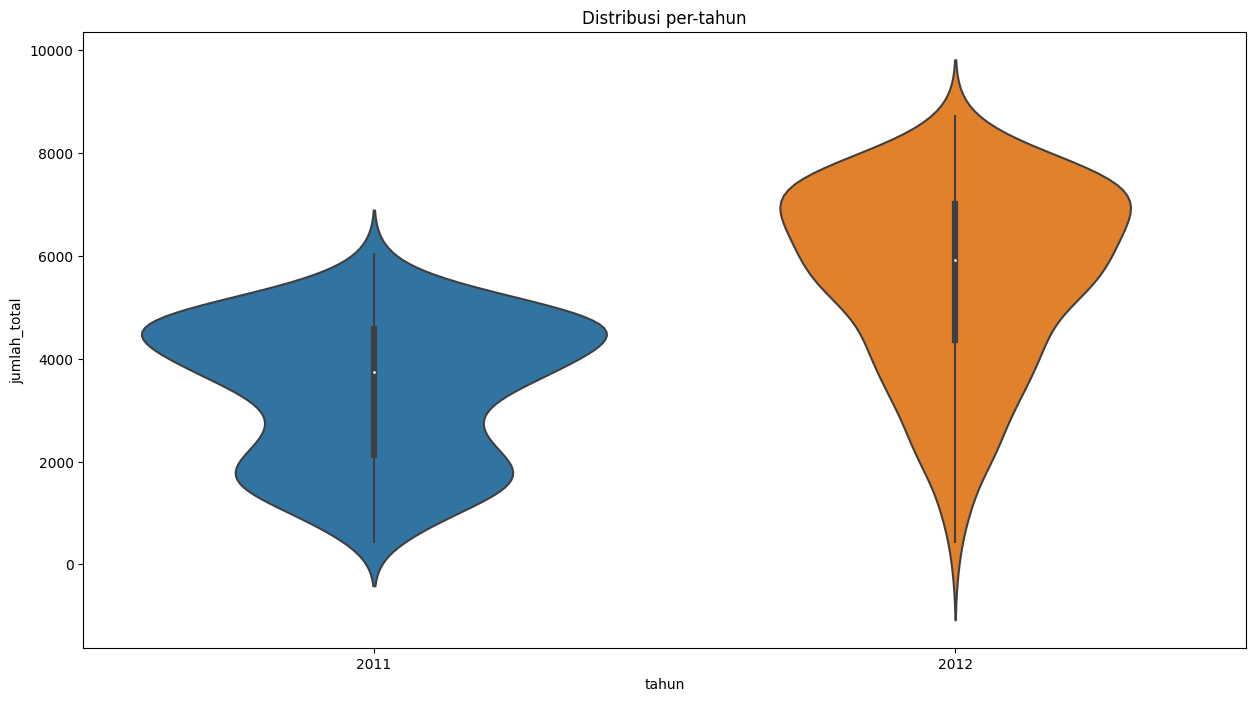

In [34]:
fig,ax=plt.subplots(figsize=(15,8))
sns.violinplot(x='tahun',y='jumlah_total',data=day_df[['tahun','jumlah_total']])
ax.set_title('Distribusi per-tahun')
plt.show()

## Visualization & Explanatory Analysis


### Pertanyaan 1: Bagaimana persebaran waktu /24 jam dalam peminjaman sepeda, apakah langkah menyediakan 24 jam service cukup  optimal?

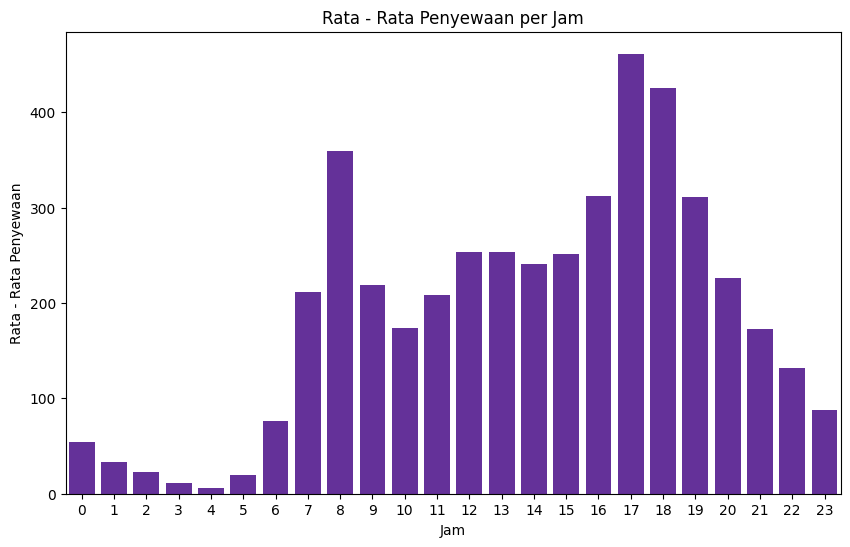

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(x=rental_jam.index, y=rental_jam.values, color="#6420AA")

plt.title("Rata - Rata Penyewaan per Jam")
plt.xlabel("Jam")
plt.ylabel("Rata - Rata Penyewaan")

plt.show()

### Pertanyaan 2: Apakah faktor alam mempengaruhi jumlah peminjaman sepeda?

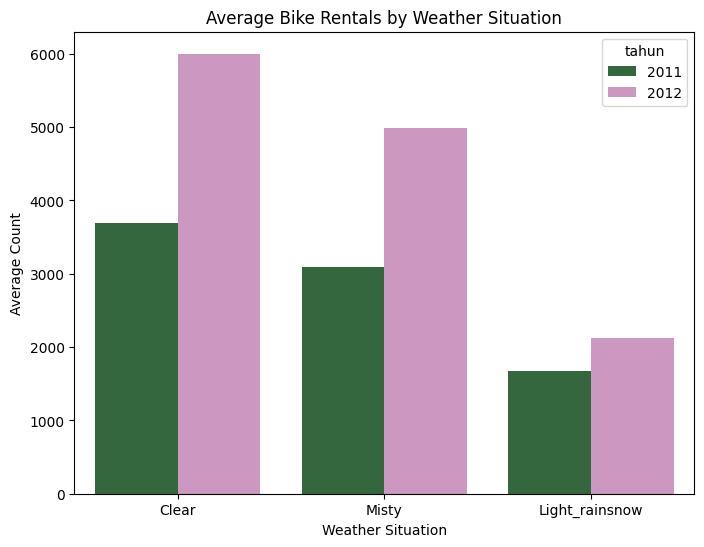

In [36]:
plt.figure(figsize=(8, 6)) 
sns.barplot(x='kondisi_cuaca', y='jumlah_total', hue='tahun', data=day_df, errorbar=None, palette="cubehelix")

plt.title('Average Bike Rentals by Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('Average Count')

plt.show()

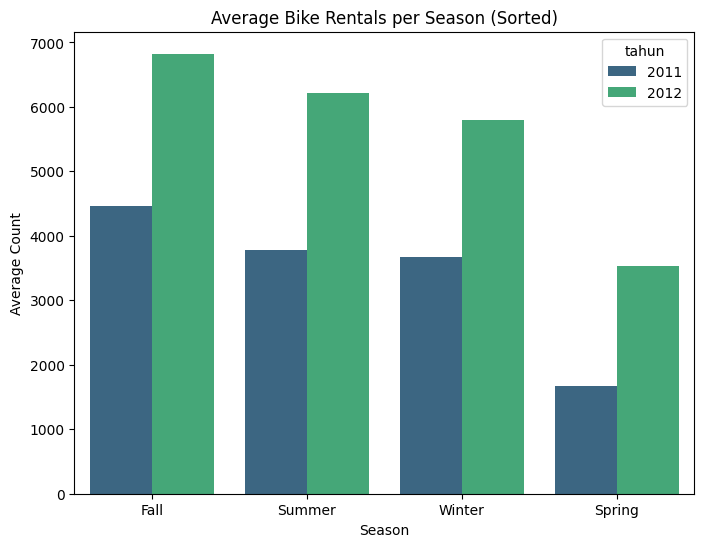

In [37]:
avg_jumlah_per_season = day_df.groupby('season')['jumlah_total'].mean().reset_index().sort_values('jumlah_total', ascending=False)

sorted_seasons = avg_jumlah_per_season['season']

plt.figure(figsize=(8, 6))
sns.barplot(x='season', y='jumlah_total', hue='tahun', data=day_df, errorbar=None, palette="viridis", order=sorted_seasons)

plt.title('Average Bike Rentals per Season (Sorted)')
plt.xlabel('Season')
plt.ylabel('Average Count')

plt.show()

### Pertanyaan 3: Apakah faktor buatan manusia (human-made) mempengaruhi jumlah peminjaman sepeda?

#### 1.  Faktor Musim Libur

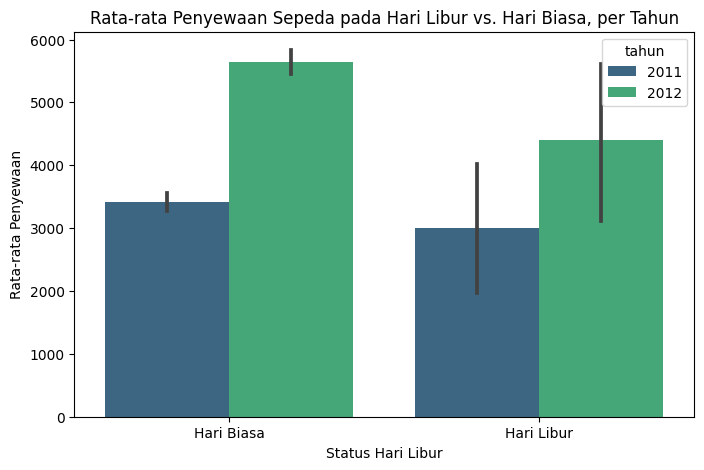

In [38]:
plt.figure(figsize=(8, 5))

# Use the original 'day_df' DataFrame directly with Seaborn
sns.barplot(x='holiday', y='jumlah_total', hue='tahun', data=day_df, palette="viridis")

plt.title('Rata-rata Penyewaan Sepeda pada Hari Libur vs. Hari Biasa, per Tahun')
plt.xlabel('Status Hari Libur')
plt.ylabel('Rata-rata Penyewaan')
plt.xticks([0, 1], ['Hari Biasa', 'Hari Libur'])

plt.show()

### Pertanyaan 4: Apakah bisnis peminjaman sepeda berkembang seiring nya tahun?

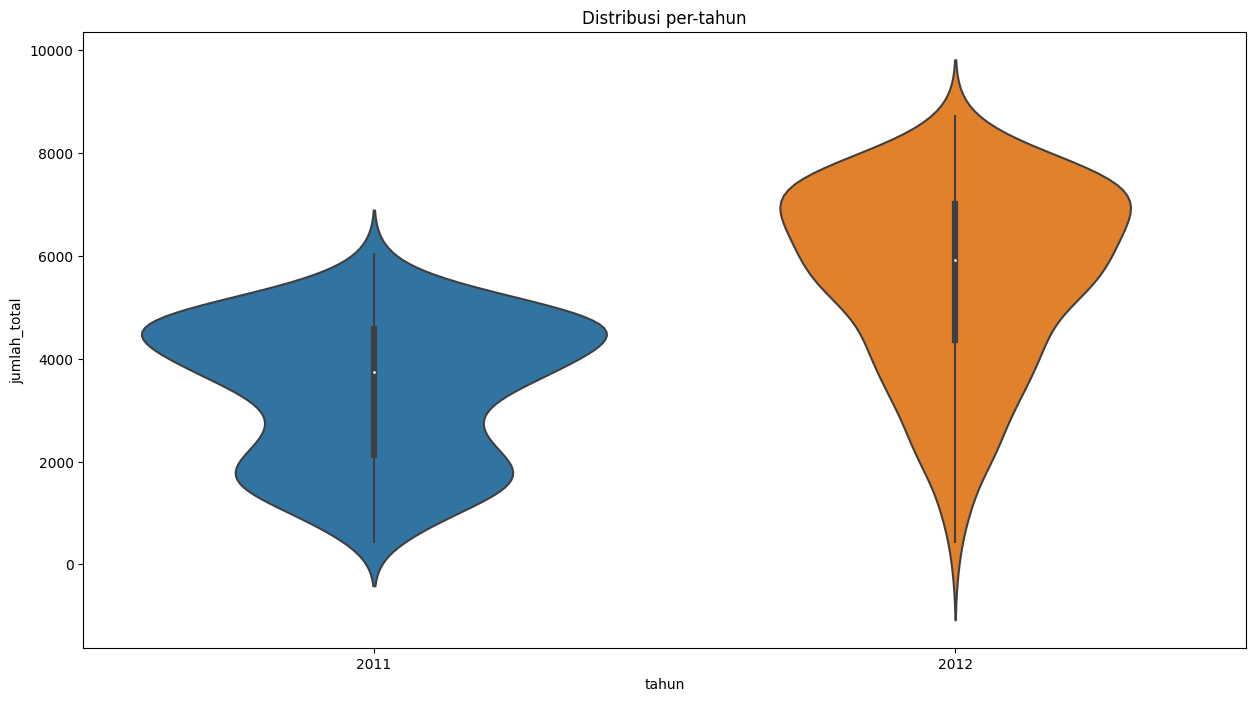

In [39]:
fig,ax=plt.subplots(figsize=(15,8))
sns.violinplot(x='tahun',y='jumlah_total',data=day_df[['tahun','jumlah_total']])
ax.set_title('Distribusi per-tahun')
plt.show()

In [40]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   tanggal                 731 non-null    datetime64[ns]
 1   season                  731 non-null    category      
 2   tahun                   731 non-null    category      
 3   month                   731 non-null    category      
 4   holiday                 731 non-null    category      
 5   weekday                 731 non-null    category      
 6   workingday              731 non-null    category      
 7   kondisi_cuaca           731 non-null    category      
 8   temp                    731 non-null    float64       
 9   atemp                   731 non-null    float64       
 10  humidity                731 non-null    float64       
 11  windspeed               731 non-null    float64       
 12  jumlah_pengguna_casual  731 non-null    int64     

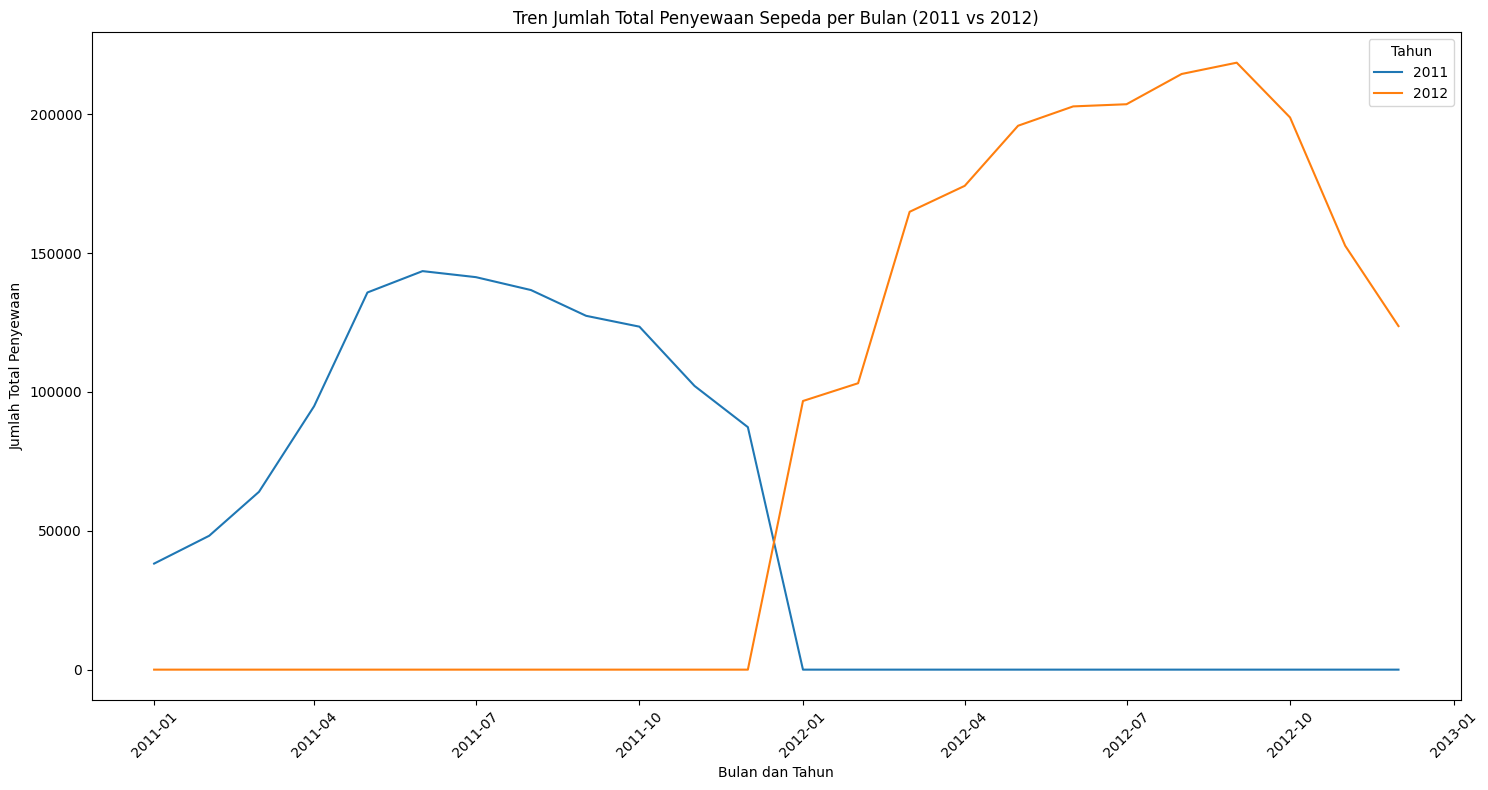

In [44]:
day_df['month_year'] = day_df['tanggal'].dt.to_period('M')
monthly_rentals = day_df.groupby(['month_year', 'tahun'])['jumlah_total'].sum().reset_index()
monthly_rentals_pivot = monthly_rentals.pivot(index='month_year', columns='tahun', values='jumlah_total')
monthly_rentals_pivot.index = monthly_rentals_pivot.index.to_timestamp()

plt.figure(figsize=(15, 8))

# Plot each column as a line
for column in monthly_rentals_pivot.columns:
    plt.plot(monthly_rentals_pivot.index, monthly_rentals_pivot[column], label=column)

plt.title('Tren Jumlah Total Penyewaan Sepeda per Bulan (2011 vs 2012)')
plt.xlabel('Bulan dan Tahun')
plt.ylabel('Jumlah Total Penyewaan')
plt.xticks(rotation=45) 
plt.legend(title='Tahun')
plt.tight_layout() 
plt.show()

## Conclusion


### 1. Bagaimana persebaran waktu /24 jam dalam peminjaman sepeda, apakah langkah menyediakan 24 jam service cukup  optimal?
    a. Terdapat puncak signifikan pada jam-jam tertentu dalam sehari, terutama sekitar jam 8 pagi dan antara jam 5 sore hingga 6 sore. Pola ini kemungkinan menunjukkan waktu sibuk ketika orang berangkat dan pulang dari tempat kerja atau sekolah.
    b. Ada tingkat aktivitas penyewaan yang relatif tinggi selama jam-jam tengah hari, yang mungkin menunjukkan bahwa sepeda juga digunakan untuk aktivitas lain selain berangkat kerja, seperti urusan pribadi, perjalanan saat makan siang, atau kegiatan rekreasi.
    c. Jumlah penyewaan menurun secara signifikan pada malam hari dan dini hari (sekitar jam 10 malam hingga jam 5 pagi).
    
    Kesimpulan: Permintaan penyewaan sepeda jauh lebih tinggi selama jam berangkat dan pulang kerja serta tetap cukup tinggi selama siang hari. Terdapat penurunan tajam dalam penyewaan sepeda selama jam malam.

**Rekomendasi**: Mengingat pola penggunaan saat ini, mempertahankan layanan 24 jam masih dapat dianggap optimal karena alasan berikut:

    a. Layanan tersebut memenuhi perubahan pola perjalanan komuter, seperti mereka yang bekerja di shift malam atau pagi hari, memastikan ketersediaan layanan untuk semua pengguna potensial.
    b. Permintaan yang stabil selama siang hari dapat menunjukkan bahwa pengguna menghargai fleksibilitas untuk dapat menyewa sepeda kapan saja.
    c. Untuk efisiensi operasional, pertimbangkan penyesuaian jumlah sepeda yang tersedia dan tingkat staf berdasarkan pola permintaan, dengan lebih banyak sumber daya yang dialokasikan selama waktu puncak dan layanan yang dikurangi namun cukup selama jam-jam tidak sibuk.
    d. Pemantauan terus-menerus terhadap pola penyewaan setiap jam penting. Jika permintaan pada malam hari tetap konsisten rendah dalam jangka waktu yang lama, mungkin layak mempertimbangkan model alternatif untuk jam-jam tersebut, seperti stasiun otomatis dengan staf yang dikurangi.
    
### 2. Apakah faktor alam mempengaruhi jumlah peminjaman sepeda?

Berdasarkan dua grafik yang diberikan, kita dapat mengamati pengaruh faktor alam terhadap jumlah peminjaman sepeda:

1. Pengaruh Kondisi Cuaca: Grafik pertama menunjukkan rata-rata penyewaan sepeda berdasarkan situasi cuaca. Terlihat bahwa jumlah peminjaman tertinggi terjadi pada cuaca 'Clear' (cerah), yang menurun secara signifikan pada cuaca 'Misty' (berkabut), dan turun lebih jauh lagi pada 'Light_rainsnow' (hujan ringan/salju). Ini menunjukkan bahwa cuaca yang lebih baik cenderung mendorong lebih banyak orang untuk menyewa sepeda, sedangkan kondisi cuaca yang buruk, seperti hujan atau salju, mengurangi kecenderungan tersebut.

2. Pengaruh Musim: Grafik kedua menunjukkan rata-rata penyewaan sepeda untuk setiap musim, diurutkan dari yang tertinggi ke terendah. Musim gugur ('Fall') dan musim panas ('Summer') memiliki rata-rata penyewaan yang lebih tinggi dibandingkan dengan musim dingin ('Winter') dan musim semi ('Spring'). Ini menegaskan bahwa musim dengan suhu yang lebih hangat—yang mungkin menyediakan kondisi yang lebih nyaman untuk bersepeda—mengalami jumlah peminjaman yang lebih tinggi.

**Kesimpulan**: Faktor alam, seperti kondisi cuaca dan musim, memiliki pengaruh yang signifikan terhadap jumlah peminjaman sepeda. Cuaca yang cerah dan musim yang lebih hangat tampaknya menjadi kondisi yang paling mendukung untuk bersepeda, sedangkan cuaca buruk dan musim yang lebih dingin cenderung mengurangi jumlah penyewaan. Ini menunjukkan bahwa penyedia layanan penyewaan sepeda mungkin perlu menyesuaikan ketersediaan dan strategi layanan mereka berdasarkan kondisi alam untuk memaksimalkan penggunaan dan kepuasan pelanggan.
### 3. Apakah faktor buatan manusia juga mempengaruhi jumlah peminjaman sepeda?
1. Rata-rata jumlah penyewaan sepeda lebih tinggi pada hari biasa dibandingkan dengan hari libur, yang menunjukkan adanya peningkatan penggunaan sepeda saat orang bekerja atau bersekolah.

**Rekomendasi** : Penyedia layanan sepeda dapat mempertimbangkan untuk meningkatkan jumlah sepeda yang tersedia atau melakukan promosi khusus pada hari biasa untuk memaksimalkan pemanfaatan layanan mereka. Selain itu, strategi pemasaran yang bertujuan untuk menarik pengguna pada hari-hari biasa juga bisa dipertimbangkan untuk meningkatkan angka penyewaan sepeda secara keseluruhan.

### 4. Apakah bisnis peminjaman sepeda berkembang seiring nya tahun?
1. Grafik untuk tahun 2011 (biru) menunjukkan distribusi yang lebih pendek terhadap jumlah pengguna dibandingkan dengan tahun 2012 (oranye), yang menunjukkan adanya peningkatan dalam jumlah penyewaan sepeda pada tahun 2012.
2. Pada tahun 2012, terdapat peningkatan pada median (garis horizontal di tengah plot), mode (titik paling lebar pada plot), dan jangkauan data (dari bawah ke atas plot) dibandingkan dengan tahun 2011.
3. Tidak hanya median yang lebih tinggi, tetapi bentuk distribusi pada tahun 2012 juga menunjukkan bahwa lebih banyak hari dengan jumlah penyewaan yang tinggi dibandingkan tahun 2011.

**Rekomendasi** : Trend positif ini menunjukkan bahwa ada peluang untuk terus mengembangkan bisnis penyewaan sepeda. Untuk memanfaatkan pertumbuhan ini, penyedia layanan sepeda mungkin perlu meningkatkan ketersediaan sepeda, memperbaiki infrastruktur, atau menawarkan promosi yang sesuai untuk menarik lebih banyak pengguna. Selain itu, penting juga untuk terus memantau trend peminjaman untuk mengidentifikasi peluang dan tantangan yang mungkin muncul seiring berjalannya waktu.